<a href="https://colab.research.google.com/github/Monishraj50/TSF_Intern/blob/master/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK3 - KMeans Clustering
Find out the optimum number of clusters for KMeans?

**Importing Libraries**

In [380]:
import pandas as pd
import numpy as np
import math
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [381]:
#Loading the data from sklearn datasets
iris = datasets.load_iris()

##Data Preprocessing

In [382]:
#creating dataframe 
data = pd.DataFrame(iris.data,columns=iris.feature_names)
#checking the top 5 data
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [383]:
#Checking Null values
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [384]:
#Describing the data
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###Finding the optimum number of clusters for KMeans using Elbow Graph

In [385]:
X = data.iloc[:,[0, 1, 2, 3]].values

In [386]:

d=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
  kmeans.fit(X)
  d.append(kmeans.inertia_)


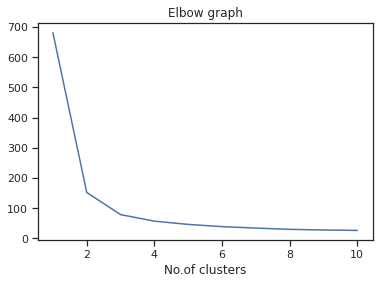

In [388]:
#Plotting the elbow graph
plt.plot(range(1,11),y)
plt.title('Elbow graph')
plt.xlabel('No.of clusters')
plt.show()

In [389]:
kmeans_final=KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=0)
#Fitting the data
kmeans_final.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [390]:
y_pred = kmeans_final.fit_predict(X)

In [391]:
y_pred_df=pd.DataFrame({'y_pred': y_pred})
df = pd.concat([data,y_pred_df],axis =1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_pred
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [393]:
conditions = [(df['y_pred']==0),(df['y_pred']==1),(df['y_pred']==2)]
choices = ['Iris-setosa','Iris-versicolour','Iris-virginica']
df['y_pred_name']=np.select(conditions,choices,None)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_pred,y_pred_name
0,5.1,3.5,1.4,0.2,1,Iris-versicolour
1,4.9,3.0,1.4,0.2,1,Iris-versicolour
2,4.7,3.2,1.3,0.2,1,Iris-versicolour
3,4.6,3.1,1.5,0.2,1,Iris-versicolour
4,5.0,3.6,1.4,0.2,1,Iris-versicolour
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,Iris-setosa
146,6.3,2.5,5.0,1.9,2,Iris-virginica
147,6.5,3.0,5.2,2.0,0,Iris-setosa
148,6.2,3.4,5.4,2.3,0,Iris-setosa


In [394]:
#Finding the centroids
centroids=pd.DataFrame({'centroid_x':kmeans_final.cluster_centers_[:,0],'centroid_y':kmeans_final.cluster_centers_[:,1]})
centroids

,centroid_x,centroid_y
0,6.850000,3.073684
1,5.006000,3.428000
2,5.901613,2.748387


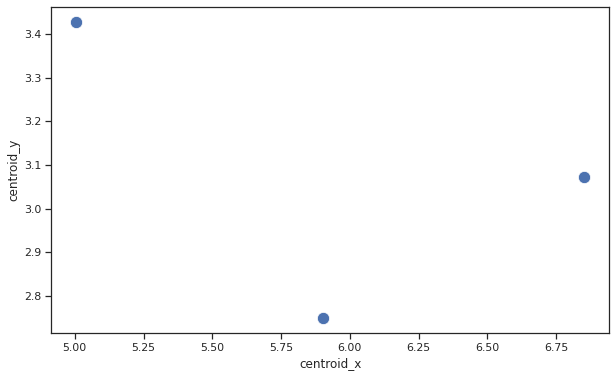

In [395]:
#Plotting the centroids
fig = plt.gcf()
fig.set_size_inches(10,6)
sns.scatterplot(x='centroid_x',y='centroid_y',data=centroids,s=150)

In [396]:
#Creating a function to calculate the difference between centroid and flower sepal
def distance(df,centroids):
  for i in range(3):
    df['distance_from_{}'.format(i)]=np.sqrt((df['sepal length (cm)']-centroids.iloc[i,0])**2 
                                              + (df['sepal width (cm)'] - centroids.iloc[i,1])**2)
  return df    

In [397]:
df1=distance(df,centroids)
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_pred,y_pred_name,distance_from_0,distance_from_1,distance_from_2
0,5.1,3.5,1.4,0.2,1,Iris-versicolour,1.801179,0.118406,1.098865
1,4.9,3.0,1.4,0.2,1,Iris-versicolour,1.951392,0.440931,1.032733
2,4.7,3.2,1.3,0.2,1,Iris-versicolour,2.153707,0.381602,1.283677
3,4.6,3.1,1.5,0.2,1,Iris-versicolour,2.250154,0.521939,1.348268
4,5.0,3.6,1.4,0.2,1,Iris-versicolour,1.923411,0.172105,1.240222
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,Iris-setosa,0.167121,1.747232,0.837097
146,6.3,2.5,5.0,1.9,2,Iris-virginica,0.794741,1.592363,0.469477
147,6.5,3.0,5.2,2.0,0,Iris-setosa,0.357672,1.554098,0.649135
148,6.2,3.4,5.4,2.3,0,Iris-setosa,0.727311,1.194328,0.716683


##Visualization

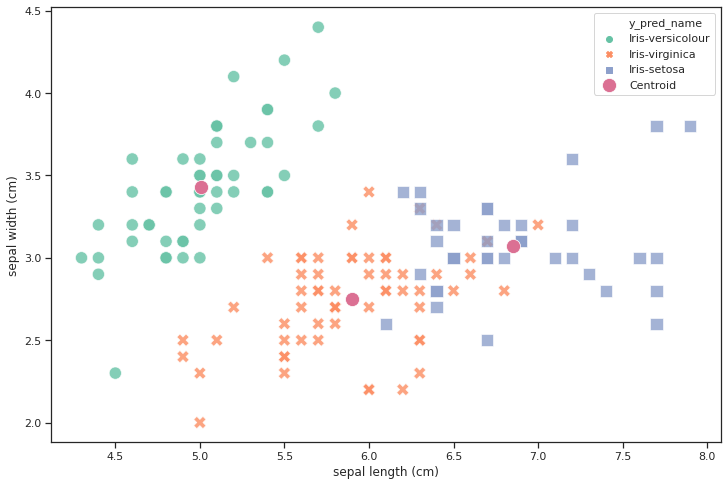

In [398]:
#Visualing the clusters - from the first two rows
import seaborn as sns;sns.set()
fig = plt.gcf()
fig.set_size_inches(12,8)
sns.set(style='ticks')
ax = sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',
                data = df,hue='y_pred_name',style='y_pred_name',palette ='Set2',s=150,alpha=0.8)
ax = sns.scatterplot(x=kmeans_final.cluster_centers_[:, 0],
                     y=kmeans_final.cluster_centers_[:, 1],
                     s=200,color='palevioletred',
                     label='Centroid')

